OpenClassrooms - parcours Data Analyst Business Intelligence - P8

# Milestone 1 - Analyse des données

Dans cette partie nous allons analyser le jeu de données que nous avons à notre disposition. Notre objectif est de comprendre les relations entre les variables, et surtout, celles qui influent sur le prix des transactions immobilières. Grâce à ce travail, nous pourrons ne conserver que les variables qui seront utiles à l'apprentissage de notre algorithme.

## 1.Type des données

La première étape à réaliser est d'importer les données dans le notebook et d'opérer des transformations sur les variables si celles-ci s'imposent (exemple : nettoyage ou changement de type des variables, etc.).

In [81]:
#On importe les librairies que nous utiliserons pour traiter les données et les visualiser
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

In [82]:
#On importe les données dans un dataframe
df_h_immobilier=pd.read_excel('h_immobilier.xlsx')
df_h_immobilier

,date_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,code_postal,nom_commune,code_type_local,type_local,surface_reelle
0,2017-01-03,5.505597e+05,8,RUE DES COUTURES SAINT GERVAIS,75003,Paris 3e Arrondissement,2,Appartement,50
1,2017-01-12,1.576492e+06,32,AV MARCEAU,75008,Paris 8e Arrondissement,2,Appartement,163
2,2017-01-10,6.577574e+05,52,RUE DU FAUBOURG SAINT HONORE,75008,Paris 8e Arrondissement,2,Appartement,66
3,2017-01-10,2.500868e+05,64,RUE DU VERTBOIS,75003,Paris 3e Arrondissement,2,Appartement,22
4,2017-01-13,1.762667e+05,25,RUE DES LAVANDIERES STE OPPORT,75001,Paris 1er Arrondissement,2,Appartement,15
...,...,...,...,...,...,...,...,...,...
26191,2021-02-25,4.712239e+05,16,RUE DU BOURG TIBOURG,75004,Paris 4e Arrondissement,2,Appartement,37
26192,2021-02-17,1.982330e+06,23,RUE DU SENTIER,75002,Paris 2e Arrondissement,4,Local industriel. commercial ou assimilé,150
26193,2021-03-08,3.124359e+05,5,RUE SAINT-SAUVEUR,75002,Paris 2e Arrondissement,2,Appartement,26
26194,2021-03-11,1.562234e+05,15,RUE BLONDEL,75002,Paris 2e Arrondissement,2,Appartement,13


In [83]:
df_portefeuille=pd.read_excel('portefeuille.xlsx')
df_portefeuille.head()

,adresse_numero,adresse_nom_voie,code_postal,code_commune,nom_commune,surface_carrez,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,longitude,latitude
0,127,RUE SAINT-DENIS,75001,75101,Paris 1er Arrondissement,16.41,2,Appartement,25,1,2.349593,48.863227
1,62,RUE NOTRE-DAME DE NAZARETH,75003,75103,Paris 3e Arrondissement,20.47,2,Appartement,22,1,2.356977,48.867907
2,62,RUE DE TURENNE,75003,75103,Paris 3e Arrondissement,64.48,2,Appartement,65,3,2.364855,48.859318
3,32,AV GEORGE V,75008,75108,Paris 8e Arrondissement,63.29,2,Appartement,74,2,2.301586,48.868893
4,152,BD HAUSSMANN,75008,75108,Paris 8e Arrondissement,20.58,2,Appartement,22,1,2.311643,48.875490


Attention, si l'opération ci-dessus ne marche pas, il se peut que le package "openpyxl" ne soit pas présent sur votre ordinateur. Si c'est le cas vous pouvez l'installer en éxécutant la commande : pip install openpyxl ou conda install openpyxl.

In [84]:
#On vérifie que le type des données attribué par pandas est cohérent
df_h_immobilier.dtypes

date_mutation       datetime64[ns]
valeur_fonciere            float64
adresse_numero               int64
adresse_nom_voie            object
code_postal                  int64
nom_commune                 object
code_type_local              int64
type_local                  object
surface_reelle               int64
dtype: object

In [85]:
df_portefeuille.dtypes

adresse_numero                 int64
adresse_nom_voie              object
code_postal                    int64
code_commune                   int64
nom_commune                   object
surface_carrez               float64
code_type_local                int64
type_local                    object
surface_reelle_bati            int64
nombre_pieces_principales      int64
longitude                    float64
latitude                     float64
dtype: object

### 2. Regardons les différents types de biens immobiliers que nous avons dans nos données :

In [90]:
df_h_immobilier['type_local'].unique()
df_portefeuille['type_local'].unique()

array(['Appartement', 'Local industriel. commercial ou assimilé'],
      dtype=object)

In [91]:
#combinaison des 2 uniques
types_biens_immobiliers = set(df_h_immobilier['type_local']) | set(df_portefeuille['type_local'])
print('la liste des différents types de biens immobiliers que nous avons dans les données est ?:')
for type_bien in types_biens_immobiliers:
    print(type_bien)

la liste des différents types de biens immobiliers que nous avons dans les données est ?:
Local industriel. commercial ou assimilé
Appartement


In [92]:
# Compter le nombre de types de biens uniques
nombre_types_biens = df_h_immobilier['type_local'].nunique()

# Obtenir la liste des codes de types de biens uniques
codes_types_biens = df_h_immobilier['code_type_local'].unique()

# Afficher le nombre de types de biens et leurs codes correspondants
print("Il y a {} types de biens, et leurs codes types sont :".format(nombre_types_biens))
for code_type in codes_types_biens:
    print("Code : {}, Type : {}".format(code_type, df_h_immobilier[df_h_immobilier['code_type_local'] == code_type]['type_local'].iloc[0]))

Il y a 2 types de biens, et leurs codes types sont :
Code : 2, Type : Appartement
Code : 4, Type : Local industriel. commercial ou assimilé


In [93]:
## On observe qu'il y a 2 types de biens, et que leurs codes types sont 2 pour les appartements et 4 pour local industriel, comercial ou assimilé. 

### 3. Nombre de transactions

In [94]:
#On verifie le nombre de transactions que nous avons dans notre dataframe
print('le nombre de transactions dans les données est ?')
print(df_h_immobilier.shape[0])

le nombre de transactions dans les données est ?
26196


In [166]:
print('le nombre de transactions pour les appartements dans les données est ?')
transactions_appartements = df_h_immobilier[df_h_immobilier['type_local'] == 'Appartement']
nombre_transactions_appartements = transactions_appartements.shape[0]

# Affichage des résultats
print('Le nombre de transactions pour les appartements dans les données est :', nombre_transactions_appartements)
transactions_appartements.head()

le nombre de transactions pour les appartements dans les données est ?
Le nombre de transactions pour les appartements dans les données est : 24353


,date_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,code_postal,nom_commune,code_type_local,type_local,surface_reelle
0,2017-01-03,5.505597e+05,8,RUE DES COUTURES SAINT GERVAIS,75003,Paris 3e Arrondissement,2,Appartement,50
1,2017-01-12,1.576492e+06,32,AV MARCEAU,75008,Paris 8e Arrondissement,2,Appartement,163
2,2017-01-10,6.577574e+05,52,RUE DU FAUBOURG SAINT HONORE,75008,Paris 8e Arrondissement,2,Appartement,66
3,2017-01-10,2.500868e+05,64,RUE DU VERTBOIS,75003,Paris 3e Arrondissement,2,Appartement,22
4,2017-01-13,1.762667e+05,25,RUE DES LAVANDIERES STE OPPORT,75001,Paris 1er Arrondissement,2,Appartement,15


In [96]:

transactions_locaux_commerciaux = df_h_immobilier[df_h_immobilier['type_local'] == 'Local industriel. commercial ou assimilé']
nombre_transactions_locaux_commerciaux = transactions_locaux_commerciaux.shape[0]

print("Le nombre de transactions pour les locaux commerciaux dans les données est :", nombre_transactions_locaux_commerciaux)

Le nombre de transactions pour les locaux commerciaux dans les données est : 1843


Maintenant nous allons analyser les données historiques pour les 2 différents types de biens immobiliers en essayant d'identifier les relations entre les variables. Mais avant cela, il nous faudra pouvoir comparer les biens entre eux, et pour cela nous allons créer une colonne du prix au metre carré.

In [97]:
# Calcul de la colonne
df_h_immobilier['prix_m2']=df_h_immobilier['valeur_fonciere']/df_h_immobilier['surface_reelle']
df_h_immobilier.head()

,date_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,code_postal,nom_commune,code_type_local,type_local,surface_reelle,prix_m2
0,2017-01-03,5.505597e+05,8,RUE DES COUTURES SAINT GERVAIS,75003,Paris 3e Arrondissement,2,Appartement,50,11011.193562
1,2017-01-12,1.576492e+06,32,AV MARCEAU,75008,Paris 8e Arrondissement,2,Appartement,163,9671.732877
2,2017-01-10,6.577574e+05,52,RUE DU FAUBOURG SAINT HONORE,75008,Paris 8e Arrondissement,2,Appartement,66,9966.020548
3,2017-01-10,2.500868e+05,64,RUE DU VERTBOIS,75003,Paris 3e Arrondissement,2,Appartement,22,11367.582877
4,2017-01-13,1.762667e+05,25,RUE DES LAVANDIERES STE OPPORT,75001,Paris 1er Arrondissement,2,Appartement,15,11751.113836


Maintenant, analysons les appartements.

### 5. Evolution du prix au metre carré des appartements dans Paris

In [98]:
#On retire les colonnes qui sont à priori inutiles ET nous allons nous concentrer sur les appartements dans un premier temps
colonnes_inutiles = ["adresse_numero", "adresse_nom_voie", "nom_commune", "code_type_local"]
df_appartements = df_h_immobilier.drop(colonnes_inutiles, axis=1)

# mettre uniquement les appartements dans mon dataframe
df_appartements = df_appartements[df_appartements['type_local'] == 'Appartement']

df_appartements.head()

,date_mutation,valeur_fonciere,code_postal,type_local,surface_reelle,prix_m2
0,2017-01-03,5.505597e+05,75003,Appartement,50,11011.193562
1,2017-01-12,1.576492e+06,75008,Appartement,163,9671.732877
2,2017-01-10,6.577574e+05,75008,Appartement,66,9966.020548
3,2017-01-10,2.500868e+05,75003,Appartement,22,11367.582877
4,2017-01-13,1.762667e+05,75001,Appartement,15,11751.113836


In [99]:
#Préparons un dataframe en regroupant les prix moyens de ventes des appartements par année avec la surface moyenne associée
#convesion de date_mutation en datetime
df_appartements['date_mutation'] = pd.to_datetime(df_appartements['date_mutation'])

# extraire 'année'de la colonne date_mutation et la mettre dans une nouvelle colonne
df_appartements['annee'] = df_appartements['date_mutation'].dt.year

# Regrouper les données par année et calculer les moyennes des prix et des surfaces pour chaque année
df_grouped = df_appartements.groupby('annee').agg({'prix_m2': 'mean', 'surface_reelle': 'mean'}).reset_index()

# Renommer les colonnes pour plus de clarté
df_grouped = df_grouped.rename(columns={'prix_m2': 'prix_moyen', 'surface_reelle': 'surface_moyenne'})

# Afficher le DataFrame résultant
print(df_grouped)


   annee    prix_moyen  surface_moyenne
0   2017   9492.859195        44.627737
1   2018  10031.403432        44.271671
2   2019  10562.712581        43.361645
3   2020  10674.872650        42.900654
4   2021  10455.600126        43.479864


In [100]:
#On constate sur la moyenne des prix de vente des appartements à Paris ,une hausse de la moyenne des prix
#Nous allons créer un graphique pour mieux le visualiser.

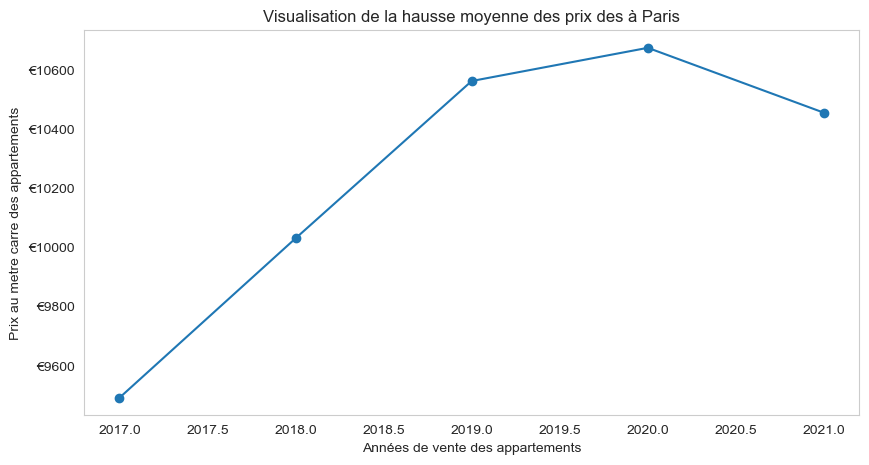

In [101]:
#Création d'un graphique pour visualiser la hausse de la moyenne des prix
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
data = {
    'annee': [2017, 2018, 2019, 2020, 2021],
    'prix_moyen': df_grouped['prix_moyen']
}
df = pd.DataFrame(data)
plt.figure(figsize=(10,5))
plt.plot(df['annee'], df['prix_moyen'], marker='o', linestyle='-')
plt.xlabel('Années de vente des appartements')
plt.ylabel('Prix au metre carre des appartements')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Visualisation de la hausse moyenne des prix des à Paris')
plt.show()

### 6. Différences de prix au metre carré entre les arrondissements

Maintenant nous allons chercher à afficher l'évolution des prix par arrondissement. Vérifions la liste des arrondissements que nous avons dans nos données. Normalement à Paris nous avons 20 codes postaux différents, 1 par arrondissement allant de 75001 à 75020.

In [102]:
#Liste des codes postaux dans nos données.
df_appartements['code_postal'].unique()

array([75003, 75008, 75001, 75006, 75005, 75007, 75010, 75009, 75011,
       75012, 75013, 75014, 75015, 75016, 75017, 75018, 75020, 75019,
       75004, 75002], dtype=int64)

In [103]:
#Créeons un dataframe pour une deuxième visualisation avec l'evolution des prix par arrondissement
# Convertir la colonne 'code_postal' en type chaîne de caractères
df_appartements['code_postal'] = df_appartements['code_postal'].astype(str)

# Extraire l'arrondissement à partir du code postal
df_appartements['arrondissement'] = df_appartements['code_postal'].str[2:]

# Regrouper les données par arrondissement et par année, et calculer les prix moyens
df_prix_par_arrondissement = df_appartements.groupby(['code_postal', 'annee'],as_index=False).agg({'prix_m2': 'mean'}).reset_index()

# Renommer la colonne 'valeur_fonciere' en 'prix_moyen'
df_prix_par_arrondissement = df_prix_par_arrondissement.rename(columns={'prix_m2': 'prix_moyen'})

# Afficher le nouveau DataFrame pour vérifier les données
df_prix_par_arrondissement.head()

,index,code_postal,annee,prix_moyen
0,0,75001,2017,11762.706289
1,1,75001,2018,12621.226146
2,2,75001,2019,13269.256149
3,3,75001,2020,13405.991820
4,4,75001,2021,13379.498578


   annee    prix_moyen  surface_moyenne
0   2017   9492.859195        44.627737
1   2018  10031.403432        44.271671
2   2019  10562.712581        43.361645
3   2020  10674.872650        42.900654
4   2021  10455.600126        43.479864


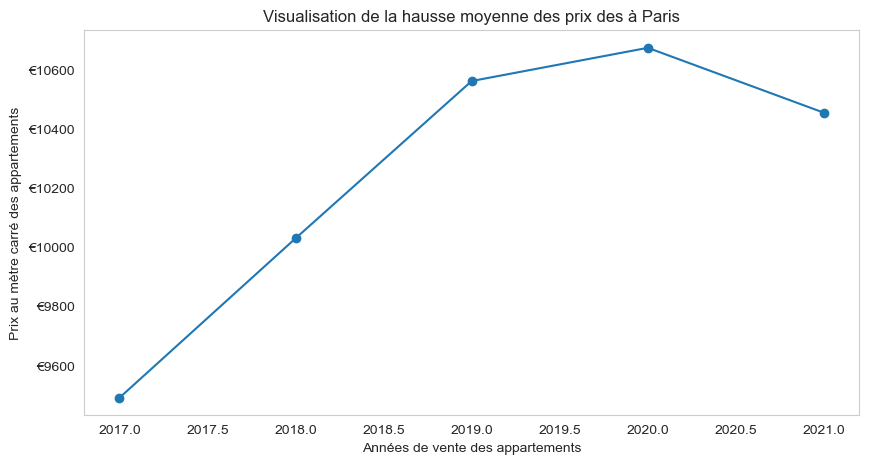

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# On retire les colonnes qui sont à priori inutiles ET nous allons nous concentrer sur les appartements dans un premier temps
colonnes_inutiles = ["adresse_numero", "adresse_nom_voie", "nom_commune", "code_type_local"]
df_appartements = df_h_immobilier.drop(colonnes_inutiles, axis=1)

# Mettre uniquement les appartements dans le dataframe
df_appartements = df_appartements[df_appartements['type_local'] == 'Appartement']

# Conversion de date_mutation en datetime
df_appartements['date_mutation'] = pd.to_datetime(df_appartements['date_mutation'])

# Extraire 'année' de la colonne date_mutation et la mettre dans une nouvelle colonne
df_appartements['annee'] = df_appartements['date_mutation'].dt.year

# Regrouper les données par année et calculer les moyennes des prix et des surfaces pour chaque année
df_grouped = df_appartements.groupby('annee').agg({'prix_m2': 'mean', 'surface_reelle': 'mean'}).reset_index()

# Renommer les colonnes pour plus de clarté
df_grouped = df_grouped.rename(columns={'prix_m2': 'prix_moyen', 'surface_reelle': 'surface_moyenne'})

# Afficher le DataFrame résultant
print(df_grouped)

# Création d'un graphique pour visualiser la hausse de la moyenne des prix
data = {
    'annee': [2017, 2018, 2019, 2020, 2021],
    'prix_moyen': df_grouped['prix_moyen']
}
df = pd.DataFrame(data)

plt.figure(figsize=(10,5))
plt.plot(df['annee'], df['prix_moyen'], marker='o', linestyle='-')
plt.xlabel('Années de vente des appartements')
plt.ylabel('Prix au mètre carré des appartements')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Visualisation de la hausse moyenne des prix des à Paris')
plt.show()

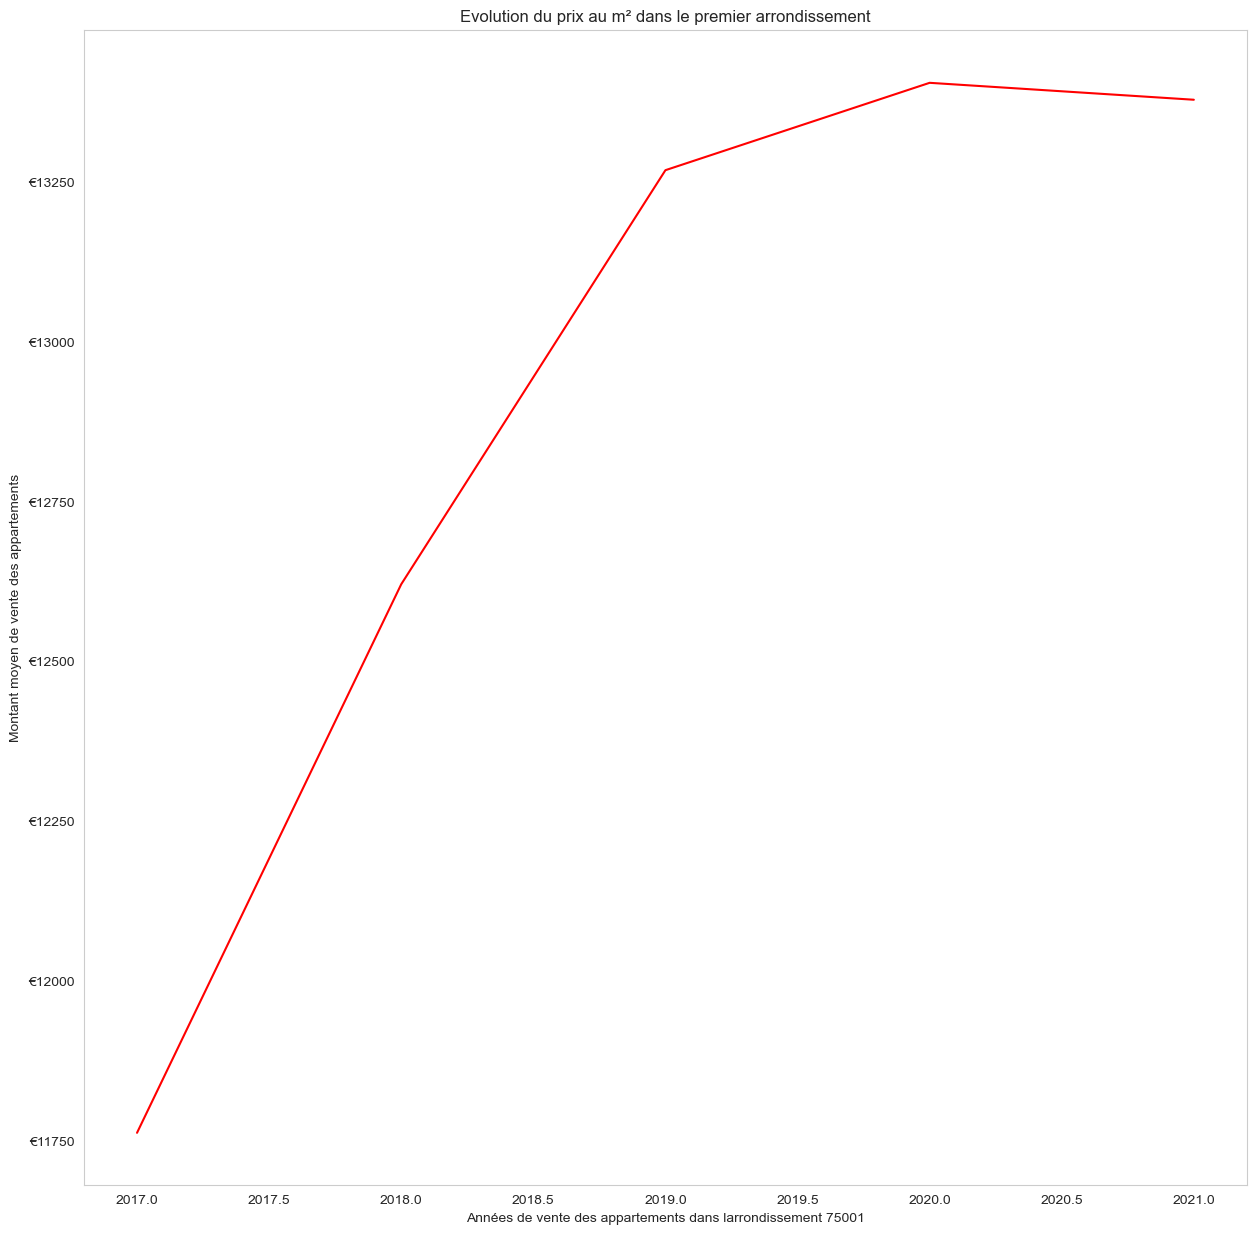

In [105]:
#Création d'un graphique pour visualiser la hausse de la moyenne des prix au metre carré dans le premier arrondissement

df_first_arrondissement= df_prix_par_arrondissement[df_prix_par_arrondissement['code_postal'] == '75001']
data = {
    'code_postal': ['75001', '75001', '75001', '75001', '75001'],
    'annee': [2017, 2018, 2019, 2020, 2021],
    'prix_moyen': df_first_arrondissement['prix_moyen']
}
df=pd.DataFrame(data)

plt.figure(figsize=(15,15))
plt.plot(df_first_arrondissement['annee'], df_first_arrondissement['prix_moyen'], color='red')
plt.xlabel('Années de vente des appartements dans larrondissement 75001')
plt.ylabel('Montant moyen de vente des appartements')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Evolution du prix au m² dans le premier arrondissement')
plt.show()




Nous allons ajouter à cette visualisation tous les autres arrondissement avec une couleur différente.

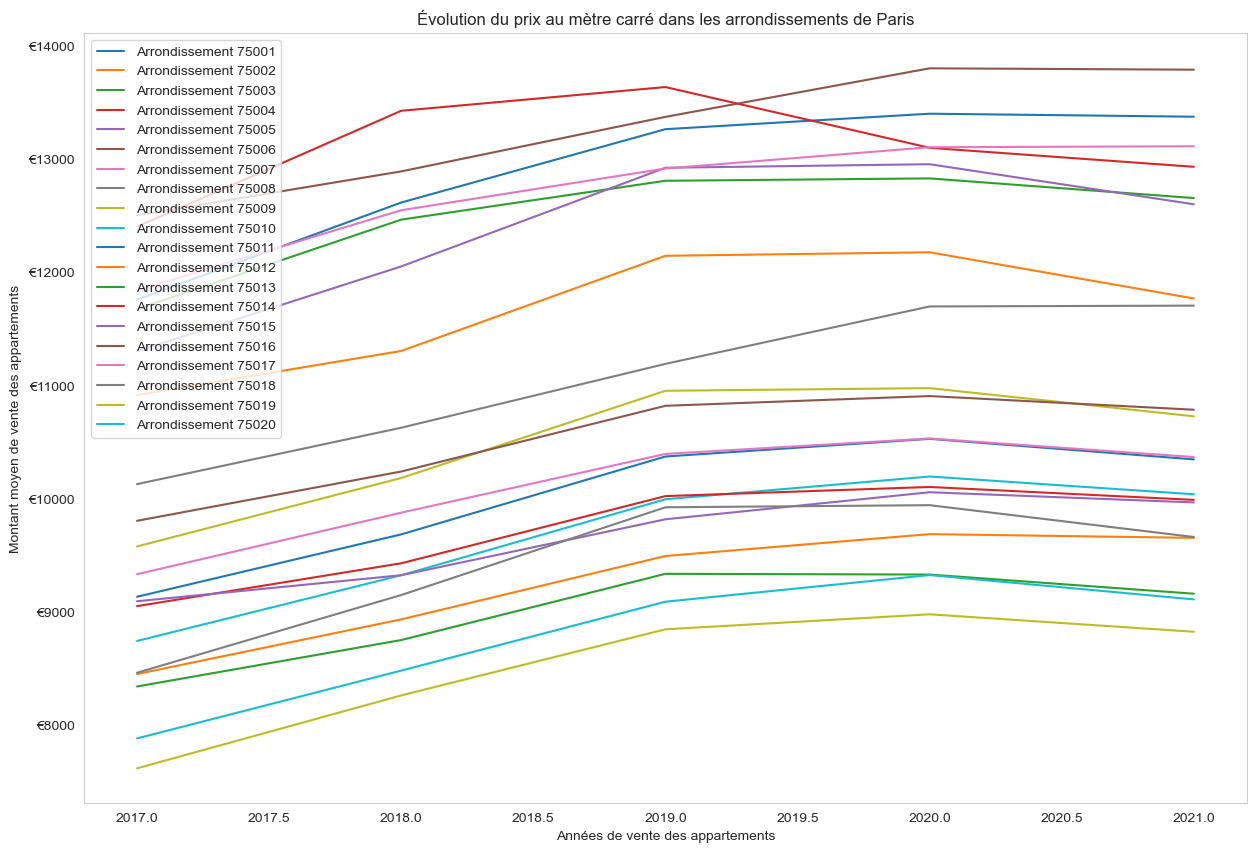

In [106]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Données extraites du DataFrame df_prix_par_arrondissement
arrondissement = df_prix_par_arrondissement['code_postal'].unique().tolist()
annee = df_prix_par_arrondissement['annee'].unique().tolist()
prix_moyen = df_prix_par_arrondissement['prix_moyen'].tolist()

plt.figure(figsize=(15, 10))

# Boucle sur les arrondissements uniques
for arr in arrondissement:
    # Filtrer les données pour l'arrondissement actuel
    df_arrondissement = df_prix_par_arrondissement[df_prix_par_arrondissement['code_postal'] == arr]
    
    # Tracer la ligne représentant l'évolution des prix au mètre carré pour cet arrondissement avec une couleur différente pour chaque arrondissement
    plt.plot(df_arrondissement['annee'], df_arrondissement['prix_moyen'], label=f'Arrondissement {arr}')

plt.xlabel('Années de vente des appartements')
plt.ylabel('Montant moyen de vente des appartements')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Évolution du prix au mètre carré dans les arrondissements de Paris')
plt.legend(loc='upper left')
plt.show()

les prix On observe globalement que :
les prix sont en constante augmentation
une baisse ou stagnation entre 2020 et 2021
les prix sont plus bas dans le 19ème comparé aux autres arrondissements.

### 7. Prix au metre carré par transaction dans un arrondissement

In [107]:
#Vérifions le nombre de transaction dans le 6ème car le prix semble élevé
transactions_6eme = df_h_immobilier[df_h_immobilier['code_postal'] == 75006]

# Compter le nombre de transactions dans le 6ème arrondissement
nombre_transactions_6eme = len(transactions_6eme)

print("Le nombre de transactions dans le 6ème arrondissement est :", nombre_transactions_6eme)

Le nombre de transactions dans le 6ème arrondissement est : 782


on constate une activité immobilière élevée dans le 6ème arrondissement.

Affichons l'historique des transactions pour visualiser la dispersion des données :

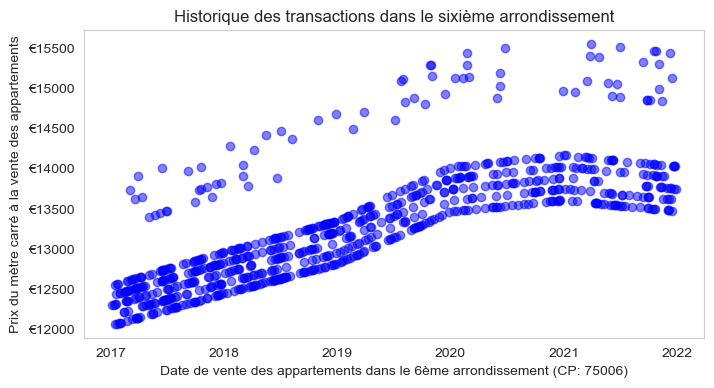

In [108]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Récupérer les données sur l'évolution des prix dans le 6ème arrondissement depuis df_prix_par_arrondissement
df_prix_6eme = df_prix_par_arrondissement[df_prix_par_arrondissement['code_postal'] == '75006']

# Récupérer les données sur les transactions dans le 6ème arrondissement depuis df_h_immobilier
transactions_6eme = df_h_immobilier[df_h_immobilier['code_postal'] == 75006]

# Tracer le graphique
plt.figure(figsize=(8, 4))

dates_vente = transactions_6eme['date_mutation']
prix_m2 = transactions_6eme['prix_m2']

plt.scatter(dates_vente, prix_m2, color='blue', alpha=0.5)

plt.xlabel('Date de vente des appartements dans le 6ème arrondissement (CP: 75006)')
plt.ylabel('Prix du mètre carré à la vente des appartements')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid(which='both')
plt.title('Historique des transactions dans le sixième arrondissement')

plt.show()

On observe une tendance à la hausse des prix de l'immobilier au fil des années. on observe également la présence de valeurs abérrantes.

Pour nous rassurer sur la relation entre les données nous allons utiliser un test statistique de corrélation.

In [109]:
from scipy.stats import pearsonr
import numpy as np

# Convertir les dates en timestamps UNIX
timestamps = transactions_6eme['date_mutation'].astype(np.int64) // 10**9

# Calcul de la corrélation de Pearson entre les timestamps et les prix au mètre carré
correlation, p_value = pearsonr(timestamps, transactions_6eme['prix_m2'])

# Affichage du résultat
print("Coefficient de corrélation de Pearson :", correlation)


Coefficient de corrélation de Pearson : 0.7711785955434649


Pour cette distribution nous allons calculer le coefficient de corrélation de Pearson. La relation entre le prix au metre carré et la date n'est pas forcément linéaire mais elle s'en rapproche suffisamment pour que cette analyse soit pertinente (voir l'évolution du prix au metre carré globale montrée plus haut, on a presque une droite sauf entre 2020 et 2021). Ce qui nous interesse c'est de prouver que le temps a une influence sur le prix.

In [110]:
#On calcule la corrélation de Spearman
from scipy import stats
# Importer la fonction spearmanr depuis le module scipy.stats
from scipy.stats import spearmanr

#On calcule la corrélation de Spearman

correlation, p_value = spearmanr(df['annee'], df['prix_moyen'])
print("Corrélation de Spearman:", correlation)
print("P-value associée:", p_value)
print('une forte corrélation positive entre l année et le prix moyen' )

Corrélation de Spearman: 0.8999999999999998
P-value associée: 0.03738607346849874
une forte corrélation positive entre l année et le prix moyen


 Le coefficient de corrélation est de 0à1 soit 0.89 une corrélation modérée avec la variable prix_m_2 et une faible corrélation avec les autres variables, avec une pvalue de 0.03 donc nous pouvons confirmer la corrélation.

### 9. Vérification de la relation entre la valeur fonciere et la surface

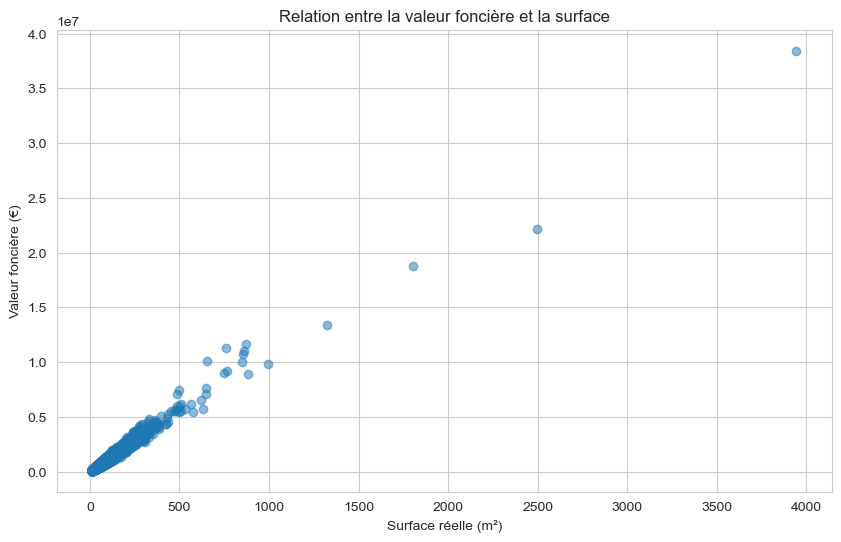

In [111]:

# Sélection des données de valeur foncière et de surface
valeur_fonciere = df_h_immobilier['valeur_fonciere']
surface_reelle = df_h_immobilier['surface_reelle']

# Création d'un nuage de points (scatter plot)
plt.figure(figsize=(10, 6))
plt.scatter(surface_reelle, valeur_fonciere, alpha=0.5)
plt.title('Relation entre la valeur foncière et la surface')
plt.xlabel('Surface réelle (m²)')
plt.ylabel('Valeur foncière (€)')
plt.grid(True)
plt.show()

In [112]:
correlation, p_value = stats.pearsonr(df_h_immobilier['valeur_fonciere'], df_h_immobilier['surface_reelle'])

# Affichage du coefficient de corrélation et de la p-value
print("Le coefficient de corrélation de Pearson est :", correlation)
print("La p-value est :", p_value)

# Interprétation du résultat
if p_value < 0.05:
    print("La relation entre la valeur foncière et la surface est statistiquement significative.")
else:
    print("La relation entre la valeur foncière et la surface n'est pas statistiquement significative.")

Le coefficient de corrélation de Pearson est : 0.9835604610064974
La p-value est : 0.0
La relation entre la valeur foncière et la surface est statistiquement significative.


Le coefficient de corrélation est de 0.98 avec une pvalue de 0.0. La relation est donc confirmée.

Regardons maintenant si le type de bien à une influence sur le prix au metre carré également.

In [113]:
prix_par_type = []
for type_bien in df_h_immobilier['type_local'].unique():
    prix_par_type.append(df_h_immobilier[df_h_immobilier['type_local'] == type_bien]['prix_m2'])

# Test d'ANOVA
anova_result = f_oneway(*prix_par_type)

# Affichage du résultat
print("Statistique de test F :", anova_result.statistic)
print("P-value :", anova_result.pvalue)

# Interprétation du résultat
if anova_result.pvalue < 0.05:
    print("Il y a une différence significative des prix au mètre carré entre les différents types de biens.")
else:
    print("Il n'y a pas de différence significative des prix au mètre carré entre les différents types de biens.")

Statistique de test F : 1976.007940742743
P-value : 0.0
Il y a une différence significative des prix au mètre carré entre les différents types de biens.


 10. Analyse des locaux industriels, commerciaux et assimilés 

In [114]:
#On crée un dataset qui ne contient que les locaux commerciaux
locaux_commerciaux = df_h_immobilier[df_h_immobilier['type_local'] == 'Local industriel. commercial ou assimilé']

locaux_commerciaux.head()

,date_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,code_postal,nom_commune,code_type_local,type_local,surface_reelle,prix_m2
18,2017-02-01,3.113277e+06,65,RUE DE TURBIGO,75003,Paris 3e Arrondissement,4,Local industriel. commercial ou assimilé,250,12453.109192
29,2017-02-17,1.164375e+06,17,RUE DU PONT AUX CHOUX,75003,Paris 3e Arrondissement,4,Local industriel. commercial ou assimilé,95,12256.581685
34,2017-02-20,3.802522e+05,10,RUE CAFFARELLI,75003,Paris 3e Arrondissement,4,Local industriel. commercial ou assimilé,31,12266.199603
91,2017-03-09,3.623842e+05,33,RUE DE RICHELIEU,75001,Paris 1er Arrondissement,4,Local industriel. commercial ou assimilé,29,12496.006027
109,2017-03-29,3.159072e+05,130,RUE VIEILLE DU TEMPLE,75003,Paris 3e Arrondissement,4,Local industriel. commercial ou assimilé,25,12636.289027


In [115]:
# créer un dataframe en regroupant les prix au metre carré moyens des ventes par année, Convertir la colonne date_mutation en type datetime si ce n'est pas déjà fait
df_h_immobilier['date_mutation'] = pd.to_datetime(df_h_immobilier['date_mutation'])

# Extraire l'année à partir de la colonne date_mutation
df_h_immobilier['annee'] = df_h_immobilier['date_mutation'].dt.year

# Regrouper les données par année et calculer la moyenne des prix au mètre carré
prix_m2_par_an = df_h_immobilier.groupby('annee')['prix_m2'].mean().reset_index()
print(prix_m2_par_an.head())

   annee       prix_m2
0   2017   9584.400231
1   2018  10130.882262
2   2019  10668.939083
3   2020  10772.111453
4   2021  10570.356087


In [116]:
# conserver les appartements
appartements = df_h_immobilier[df_h_immobilier['type_local'] == 'Appartement']

# création d'une colonne année depuis la colonne date_mutation
appartements['annee'] = appartements['date_mutation'].dt.year

# prix au metre carré moyen pour chaque année
prix_m2_moyen_par_an = appartements.groupby('annee').apply(lambda x: x['valeur_fonciere'].sum() / x['surface_reelle'].sum())

print("Prix moyen au mètre carré pour les appartements par année :")
print(prix_m2_moyen_par_an)

Prix moyen au mètre carré pour les appartements par année :
annee
2017     9589.624424
2018    10120.597583
2019    10653.425459
2020    10778.000054
2021    10551.355707
dtype: float64


C:\Users\HASSAN\AppData\Local\Temp\ipykernel_6232\1626371227.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  appartements['annee'] = appartements['date_mutation'].dt.year


In [117]:
# conserver les appartements
locaux_commerciaux = df_h_immobilier[df_h_immobilier['code_type_local'] ==4]

# création d'une colonne année depuis la colonne date_mutation
locaux_commerciaux['annee'] = locaux_commerciaux['date_mutation'].dt.year

# prix au metre carré moyen pour chaque année
prix_m2_moyen_locaux_commerciaux = locaux_commerciaux.groupby('annee').apply(lambda x: x['valeur_fonciere'].sum() / x['surface_reelle'].sum())

print("Prix moyen au mètre carré pour les locaux_commerciaux par année :")
print(prix_m2_moyen_locaux_commerciaux)

Prix moyen au mètre carré pour les locaux_commerciaux par année :
annee
2017    10728.351893
2018    11390.452590
2019    11986.785474
2020    12079.515992
2021    12165.602125
dtype: float64


C:\Users\HASSAN\AppData\Local\Temp\ipykernel_6232\787810754.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  locaux_commerciaux['annee'] = locaux_commerciaux['date_mutation'].dt.year


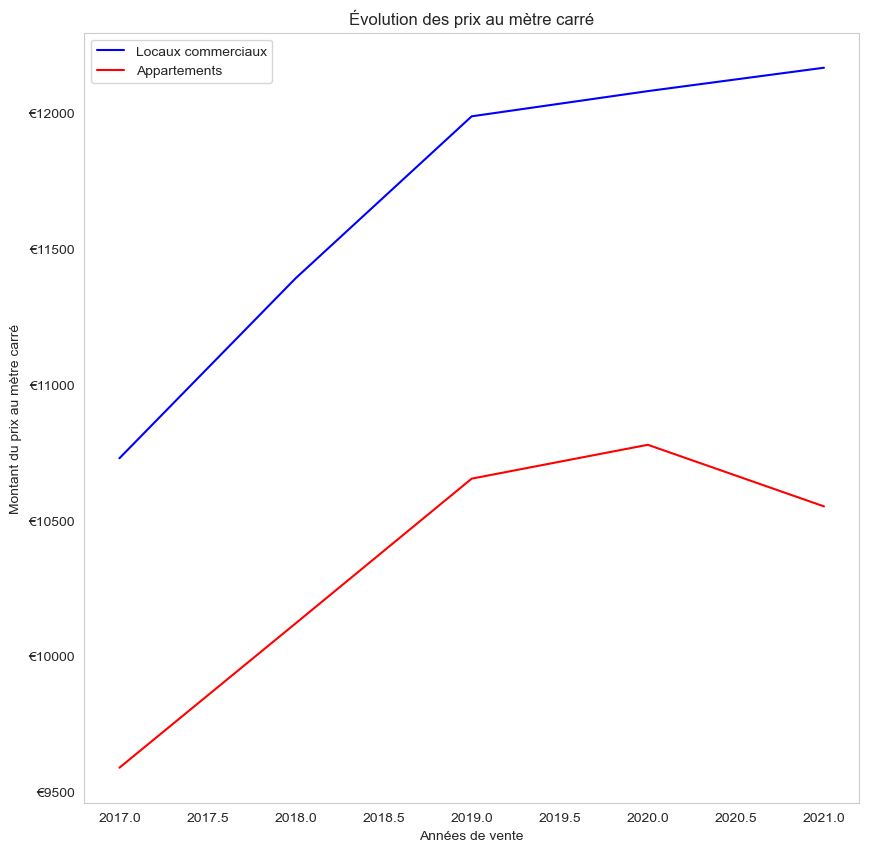

In [118]:
prix_m2_appartements = prix_m2_moyen_par_an

# Création d'un graphique pour visualiser la hausse de la moyenne des prix
plt.figure(figsize=(10, 10))
plt.plot(prix_m2_par_an['annee'], prix_m2_moyen_locaux_commerciaux, label='Locaux commerciaux', color='blue')
plt.plot(prix_m2_appartements.index, prix_m2_appartements.values, label='Appartements', color='red')
plt.xlabel('Années de vente')
plt.ylabel('Montant du prix au mètre carré')
plt.legend()
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Évolution des prix au mètre carré')
plt.show()

In [119]:
#Le prix au metre carré des locaux commerciaux est ?
prix_moyen_par_type_local = df_h_immobilier.groupby('type_local')['prix_m2'].mean()

prix_m2_locaux_commerciaux = prix_moyen_par_type_local['Local industriel. commercial ou assimilé']
print("Prix moyen au mètre carré des locaux commerciaux :", prix_m2_locaux_commerciaux)

Prix moyen au mètre carré des locaux commerciaux : 11705.022692579849


Après ces analyses, nous pouvons conclure que les dimensions à utiliser pour prédire le prix au m² sont : 
- la surface du bien immobilier,
- la date considérée, 
- la localisation (code_postal), 
- le type de bien.

# Milestone 2 - Entraînement de l'algorithme

Dans cette section nous allons maintenant entrâiner un algorithme à prédire la valeur fonciere d'un bien immobilier. Pour cela nous allons utiliser l'algorithme de régression linéaire.

On commence par préparer nos données en transformant les colonnes catégoriques du code postal et du type de local grâce au one hot encoder (sklearn) / get_dummies (pandas)

In [120]:
import pandas as pd

# Charger votre DataFrame à partir d'un fichier Excel
df_h_immobilier = pd.read_excel("h_immobilier.xlsx")  # Remplacez "votre_fichier.xlsx" par le nom de votre fichier Excel

# Application du one-hot encoding aux colonnes catégoriques
df_encoded = pd.get_dummies(df_h_immobilier, columns=['code_postal', 'type_local'],dtype=int)

# Affichage du DataFrame résultant
df_encoded

,date_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,nom_commune,code_type_local,surface_reelle,code_postal_75001,code_postal_75002,code_postal_75003,...,code_postal_75013,code_postal_75014,code_postal_75015,code_postal_75016,code_postal_75017,code_postal_75018,code_postal_75019,code_postal_75020,type_local_Appartement,type_local_Local industriel. commercial ou assimilé
0,2017-01-03,5.505597e+05,8,RUE DES COUTURES SAINT GERVAIS,Paris 3e Arrondissement,2,50,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,2017-01-12,1.576492e+06,32,AV MARCEAU,Paris 8e Arrondissement,2,163,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2017-01-10,6.577574e+05,52,RUE DU FAUBOURG SAINT HONORE,Paris 8e Arrondissement,2,66,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2017-01-10,2.500868e+05,64,RUE DU VERTBOIS,Paris 3e Arrondissement,2,22,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,2017-01-13,1.762667e+05,25,RUE DES LAVANDIERES STE OPPORT,Paris 1er Arrondissement,2,15,1,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26191,2021-02-25,4.712239e+05,16,RUE DU BOURG TIBOURG,Paris 4e Arrondissement,2,37,0,0,0,...,0,0,0,0,0,0,0,0,1,0
26192,2021-02-17,1.982330e+06,23,RUE DU SENTIER,Paris 2e Arrondissement,4,150,0,1,0,...,0,0,0,0,0,0,0,0,0,1
26193,2021-03-08,3.124359e+05,5,RUE SAINT-SAUVEUR,Paris 2e Arrondissement,2,26,0,1,0,...,0,0,0,0,0,0,0,0,1,0
26194,2021-03-11,1.562234e+05,15,RUE BLONDEL,Paris 2e Arrondissement,2,13,0,1,0,...,0,0,0,0,0,0,0,0,1,0


On utilise le train_test_split pour prélever un tiers de nos données (33%) et les garder de côté. Nous allons entraîner notre algorithme sur le reste des données et puis mesurer notre erreur moyenne en pourcentage de la valeur foncière

In [121]:
#conversion des données en str
#pour ne pas modifier le df original, je crée une copie de données transformées en str
# Créer une copie du DataFrame d'origine
df_h_immobilier_copy = df_encoded.copy()

# Conversion de toutes les colonnes en chaînes de caractères dans la copie
df_h_immobilier_copy = df_h_immobilier_copy.astype(str)
df_h_immobilier_copy
df_h_immobilier_copy.drop(['adresse_numero','adresse_nom_voie','nom_commune','code_type_local'],axis='columns',inplace=True)
df_h_immobilier_copy

,date_mutation,valeur_fonciere,surface_reelle,code_postal_75001,code_postal_75002,code_postal_75003,code_postal_75004,code_postal_75005,code_postal_75006,code_postal_75007,...,code_postal_75013,code_postal_75014,code_postal_75015,code_postal_75016,code_postal_75017,code_postal_75018,code_postal_75019,code_postal_75020,type_local_Appartement,type_local_Local industriel. commercial ou assimilé
0,2017-01-03,550559.678082192,50,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2017-01-12,1576492.45890411,163,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2017-01-10,657757.356164384,66,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2017-01-10,250086.823287671,22,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2017-01-13,176266.707534247,15,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26191,2021-02-25,471223.930958904,37,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
26192,2021-02-17,1982330.45547945,150,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
26193,2021-03-08,312435.909589041,26,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
26194,2021-03-11,156223.37739726,13,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [122]:
# Date de référence
#reference_date = pd.to_datetime('1900-01-01')

# Convertir les dates en nombre de jours écoulés depuis la date de référence
#df_h_immobilier_copy['date_mutation'] = (pd.to_datetime(df['date_mutation']) - reference_date).dt.days.astype('int32')

df_h_immobilier_copy['date_mutation']=df_h_immobilier_copy['date_mutation'].astype('datetime64[s]').astype('int64')/ 10**9
# Afficher les premières lignes du DataFrame pour vérifier les modifications
df_h_immobilier_copy.head()

,date_mutation,valeur_fonciere,surface_reelle,code_postal_75001,code_postal_75002,code_postal_75003,code_postal_75004,code_postal_75005,code_postal_75006,code_postal_75007,...,code_postal_75013,code_postal_75014,code_postal_75015,code_postal_75016,code_postal_75017,code_postal_75018,code_postal_75019,code_postal_75020,type_local_Appartement,type_local_Local industriel. commercial ou assimilé
0,1.483402,550559.678082192,50,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1.484179,1576492.45890411,163,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1.484006,657757.356164384,66,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1.484006,250086.823287671,22,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1.484266,176266.707534247,15,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [123]:
# On importe le train test split de la librairie sk_learn
from sklearn.model_selection import train_test_split

# Les colonnes de votre DataFrame qui sont utilisées comme fonctionnalités (X) et la colonne cible (y)
features = df_encoded.drop('valeur_fonciere', axis=1)
target = df_encoded['valeur_fonciere']

# On importe le train test split de la librairie sk_learn
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33, random_state=42)
print("Taille de X_train:", X_train.shape)
print("Taille de y_train:", y_train.shape)
print("Taille de X_test:", X_test.shape)
print("Taille de y_test:", y_test.shape)

Taille de X_train: (17551, 28)
Taille de y_train: (17551,)
Taille de X_test: (8645, 28)
Taille de y_test: (8645,)


In [124]:
X_train

,date_mutation,adresse_numero,adresse_nom_voie,nom_commune,code_type_local,surface_reelle,code_postal_75001,code_postal_75002,code_postal_75003,code_postal_75004,...,code_postal_75013,code_postal_75014,code_postal_75015,code_postal_75016,code_postal_75017,code_postal_75018,code_postal_75019,code_postal_75020,type_local_Appartement,type_local_Local industriel. commercial ou assimilé
5027,2017-06-27,53,RUE DE BELLEVILLE,Paris 19e Arrondissement,2,34,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
18012,2020-06-10,11,RUE DUGOMMIER,Paris 12e Arrondissement,2,17,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
11773,2019-08-02,3,RUE SCIPION,Paris 5e Arrondissement,2,22,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
23557,2021-05-06,14,RUE OUDINOT,Paris 7e Arrondissement,2,45,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8583,2018-12-12,11,RUE SAINT CHRISTOPHE,Paris 15e Arrondissement,2,29,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,2021-05-12,10,RUE GUSTAVE ROUANET,Paris 18e Arrondissement,2,33,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
5390,2017-05-19,1,RUE DU MAIL,Paris 2e Arrondissement,2,29,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
860,2017-09-05,58,RUE DU CHERCHE MIDI,Paris 6e Arrondissement,2,32,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
15795,2019-01-24,6,RUE DE TERRE NEUVE,Paris 20e Arrondissement,2,49,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [125]:
# Utilisation de la fonction get_dummies pour le one-hot encoding
#df_encoded = pd.get_dummies(df, columns=['type_local', 'code_postal'])
#df_encoded

In [126]:
df_h_immobilier.dtypes

date_mutation       datetime64[ns]
valeur_fonciere            float64
adresse_numero               int64
adresse_nom_voie            object
code_postal                  int64
nom_commune                 object
code_type_local              int64
type_local                  object
surface_reelle               int64
dtype: object

In [127]:
# Date de référence
#df_h_immobilier['date_mutation'] = pd.to_datetime(df_h_immobilier['date_mutation'])
# Date de référence
#reference_date = pd.to_datetime('1900-01-01')

# Convertir les dates en nombre de jours écoulés depuis la date de référence
#df_h_immobilier['date_mutation'] = (df_h_immobilier['date_mutation'] - reference_date).dt.days.astype('int32')

#print(df_h_immobilier)

In [128]:
#On entraîne l'algorithme ci-dessous et on effectue la prédiction
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error

# Séparer les données en variables explicatives (X) et cible (y)
X = df_h_immobilier_copy.drop(columns=['valeur_fonciere'])  # Variables explicatives
y = df_h_immobilier_copy['valeur_fonciere']  # Variable cible

# Séparer les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Créer une instance du modèle de régression linéaire
model = LinearRegression()

# Entraîner le modèle sur les données d'entraînement
model.fit(X_train, y_train)

# Faire des prédictions sur les données de test
y_pred = model.predict(X_test)

# Calculer l'erreur moyenne en pourcentage
mape = mean_absolute_percentage_error(y_test, y_pred)

# Afficher le pourcentage d'erreur moyen
print("Pourcentage d'erreur moyen:", mape * 100, "%")

Pourcentage d'erreur moyen: 9.52922066319756 %


In [129]:
X_train

,date_mutation,surface_reelle,code_postal_75001,code_postal_75002,code_postal_75003,code_postal_75004,code_postal_75005,code_postal_75006,code_postal_75007,code_postal_75008,...,code_postal_75013,code_postal_75014,code_postal_75015,code_postal_75016,code_postal_75017,code_postal_75018,code_postal_75019,code_postal_75020,type_local_Appartement,type_local_Local industriel. commercial ou assimilé
5027,1.498522,34,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
18012,1.591747,17,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
11773,1.564704,22,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
23557,1.620259,45,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
8583,1.544573,29,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,1.620778,33,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
5390,1.495152,29,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
860,1.504570,32,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
15795,1.548288,49,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


Notre algorithme fait donc 9.52 % d'erreur en moyenne sur la prédiction de la valeur foncière.

Mes conclusions sur ce résultat et comment j'aurais pu aller plus loin :
-une erreur moyenne de prédiction assez faible.                                                        
-on aurait pu utiliser des modèles plus complexes pour de meilleures performances de prédiction.
-mieux comprendre et analyser les relations entre les caractéristiques des biens immobiliers et leurs valeurs foncières.

 # Milestone 3 - Prédiction définitive pour le client 

Nous avons récupéré le fichier avec le portefeuille des actifs de la société. Nous allons l'importer puis effectuer la prédiction et statuer sur la branche qui, selon notre prédiction, aura le plus de valeur à la date demandée c'est à dire au 31 décembre 2022.<br>
Petite précision, nous souhaitons continuer à utiliser la surface réelle pour faire les calculs et pas la surface carrez. 

In [130]:
#On importe les données dans un dataframe

# Importer les données du fichier Excel dans un dataframe
df_portefeuille = pd.read_excel('portefeuille.xlsx')

# Afficher les premières lignes du dataframe pour vérifier l'importation
df_portefeuille.head()

,adresse_numero,adresse_nom_voie,code_postal,code_commune,nom_commune,surface_carrez,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,longitude,latitude
0,127,RUE SAINT-DENIS,75001,75101,Paris 1er Arrondissement,16.41,2,Appartement,25,1,2.349593,48.863227
1,62,RUE NOTRE-DAME DE NAZARETH,75003,75103,Paris 3e Arrondissement,20.47,2,Appartement,22,1,2.356977,48.867907
2,62,RUE DE TURENNE,75003,75103,Paris 3e Arrondissement,64.48,2,Appartement,65,3,2.364855,48.859318
3,32,AV GEORGE V,75008,75108,Paris 8e Arrondissement,63.29,2,Appartement,74,2,2.301586,48.868893
4,152,BD HAUSSMANN,75008,75108,Paris 8e Arrondissement,20.58,2,Appartement,22,1,2.311643,48.875490


Nous avons la liste des biens immobiliers de l'entreprise. Pour effectuer une prédiction, nous devons mettre ce fichier au même format que le dataframe que nous avons utilisé lors de l'entraînement de l'algorithme.

In [131]:
#On réutilise les mêmes fonctions pour faire le one hot encoding des variables catégorielles

#On importe la librairie datetime pour pouvoir créer une colonne timestamp avec la date du 31 décembre 2022 pour la prédiction
import datetime as dt
import pandas as pd
# Charger les données des biens immobiliers de l'entreprise depuis un fichier 

df_portefeuille= pd.read_excel('portefeuille.xlsx')  
# Réutiliser les mêmes fonctions pour le one-hot encoding des variables catégorielles
df_portefeuille_encoded = pd.get_dummies(df_portefeuille, columns=['type_local', 'code_postal'],dtype=int)
# Créer une colonne de timestamp avec la date du 31 décembre 2022 pour la prédiction
#date_prediction = dt.datetime(2022, 12, 31)
#df_portefeuille_encoded['date_prediction_timestamp'] = date_prediction
df_portefeuille_encoded['date_mutation']=int(dt.datetime(2022, 12, 31).timestamp())/ 10**9


# Afficher les premières lignes du dataframe pour vérifier les modifications
df_portefeuille_encoded.head()

,adresse_numero,adresse_nom_voie,code_commune,nom_commune,surface_carrez,code_type_local,surface_reelle_bati,nombre_pieces_principales,longitude,latitude,...,code_postal_75012,code_postal_75013,code_postal_75014,code_postal_75015,code_postal_75016,code_postal_75017,code_postal_75018,code_postal_75019,code_postal_75020,date_mutation
0,127,RUE SAINT-DENIS,75101,Paris 1er Arrondissement,16.41,2,25,1,2.349593,48.863227,...,0,0,0,0,0,0,0,0,0,1.672441
1,62,RUE NOTRE-DAME DE NAZARETH,75103,Paris 3e Arrondissement,20.47,2,22,1,2.356977,48.867907,...,0,0,0,0,0,0,0,0,0,1.672441
2,62,RUE DE TURENNE,75103,Paris 3e Arrondissement,64.48,2,65,3,2.364855,48.859318,...,0,0,0,0,0,0,0,0,0,1.672441
3,32,AV GEORGE V,75108,Paris 8e Arrondissement,63.29,2,74,2,2.301586,48.868893,...,0,0,0,0,0,0,0,0,0,1.672441
4,152,BD HAUSSMANN,75108,Paris 8e Arrondissement,20.58,2,22,1,2.311643,48.875490,...,0,0,0,0,0,0,0,0,0,1.672441


In [132]:
#Conversion du dataframe en str
df_portefeuille_encoded.columns = df_portefeuille_encoded.columns.astype(str)
#df_str = df_portefeuille_encoded.to_string(max_rows=20)
# Afficher la chaîne de caractères

#df_str = df_portefeuille_encoded.to_string(max_rows=20)
df_portefeuille_encoded

,adresse_numero,adresse_nom_voie,code_commune,nom_commune,surface_carrez,code_type_local,surface_reelle_bati,nombre_pieces_principales,longitude,latitude,...,code_postal_75012,code_postal_75013,code_postal_75014,code_postal_75015,code_postal_75016,code_postal_75017,code_postal_75018,code_postal_75019,code_postal_75020,date_mutation
0,127,RUE SAINT-DENIS,75101,Paris 1er Arrondissement,16.41,2,25,1,2.349593,48.863227,...,0,0,0,0,0,0,0,0,0,1.672441
1,62,RUE NOTRE-DAME DE NAZARETH,75103,Paris 3e Arrondissement,20.47,2,22,1,2.356977,48.867907,...,0,0,0,0,0,0,0,0,0,1.672441
2,62,RUE DE TURENNE,75103,Paris 3e Arrondissement,64.48,2,65,3,2.364855,48.859318,...,0,0,0,0,0,0,0,0,0,1.672441
3,32,AV GEORGE V,75108,Paris 8e Arrondissement,63.29,2,74,2,2.301586,48.868893,...,0,0,0,0,0,0,0,0,0,1.672441
4,152,BD HAUSSMANN,75108,Paris 8e Arrondissement,20.58,2,22,1,2.311643,48.875490,...,0,0,0,0,0,0,0,0,0,1.672441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,15,AV DE LAUMIERE,75119,Paris 19e Arrondissement,14.12,4,16,0,2.380450,48.883397,...,0,0,0,0,0,0,0,1,0,1.672441
271,3,RUE SAINT-JOSEPH,75102,Paris 2e Arrondissement,14.10,4,15,0,2.345110,48.868196,...,0,0,0,0,0,0,0,0,0,1.672441
272,2,RUE GRETRY,75102,Paris 2e Arrondissement,34.85,4,35,0,2.337593,48.870514,...,0,0,0,0,0,0,0,0,0,1.672441
273,115,RUE D ABOUKIR,75102,Paris 2e Arrondissement,41.61,4,49,0,2.349804,48.868784,...,0,0,0,0,0,0,0,0,0,1.672441


In [133]:
df_portefeuille_encoded.drop(['adresse_numero','adresse_nom_voie','nom_commune','code_commune','surface_carrez','code_type_local','nombre_pieces_principales','latitude','longitude'],axis='columns',inplace=True)
df_portefeuille_encoded.rename(columns={'surface_reelle_bati':'surface_reelle'}, inplace=True)
df_portefeuille_encoded

,surface_reelle,type_local_Appartement,type_local_Local industriel. commercial ou assimilé,code_postal_75001,code_postal_75002,code_postal_75003,code_postal_75004,code_postal_75005,code_postal_75006,code_postal_75007,...,code_postal_75012,code_postal_75013,code_postal_75014,code_postal_75015,code_postal_75016,code_postal_75017,code_postal_75018,code_postal_75019,code_postal_75020,date_mutation
0,25,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.672441
1,22,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.672441
2,65,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.672441
3,74,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.672441
4,22,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.672441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,16,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1.672441
271,15,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.672441
272,35,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.672441
273,49,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.672441


In [134]:
df_portefeuille_encoded = df_portefeuille_encoded[['date_mutation','surface_reelle','code_postal_75001', 'code_postal_75002','code_postal_75003','code_postal_75004','code_postal_75005','code_postal_75006','code_postal_75007','code_postal_75008','code_postal_75009','code_postal_75010','code_postal_75011','code_postal_75012','code_postal_75013','code_postal_75014','code_postal_75015','code_postal_75016','code_postal_75017','code_postal_75018','code_postal_75019','code_postal_75020','type_local_Appartement','type_local_Local industriel. commercial ou assimilé']]

Notre dataframe est prêt à être utilisé par notre algorithme de prédiction.

In [135]:
#On effectue la prédiction
#Conversion du dataframe en str
df_portefeuille_encoded.columns = df_portefeuille_encoded.columns.astype(str)
df_portefeuille_encoded


#On effectue la prédiction
y_predict_final=model.predict(df_portefeuille_encoded)
#On vérifie les 10 premières valeurs
y_predict_final[:10]
#On vérifie les 10 premières valeurs
# Obtenir les 10 premières valeurs prédites
#dix_premieres_predictions = y_predict_final.head(10)

# Afficher les 10 premières valeurs prédites
#dix_premieres_predictions

array([431442.69547606, 368859.73636052, 827084.7044644 , 878983.19832371,
       324850.67875623, 463383.8086481 , 390172.52557466, 642452.47687867,
       139735.13090578, 141905.21390906])

In [136]:
df_portefeuille_encoded

,date_mutation,surface_reelle,code_postal_75001,code_postal_75002,code_postal_75003,code_postal_75004,code_postal_75005,code_postal_75006,code_postal_75007,code_postal_75008,...,code_postal_75013,code_postal_75014,code_postal_75015,code_postal_75016,code_postal_75017,code_postal_75018,code_postal_75019,code_postal_75020,type_local_Appartement,type_local_Local industriel. commercial ou assimilé
0,1.672441,25,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1.672441,22,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1.672441,65,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1.672441,74,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,1.672441,22,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,1.672441,16,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
271,1.672441,15,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
272,1.672441,35,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
273,1.672441,49,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Maintenant nous allons comparer la valorisation prédite pour les deux segments.

In [137]:
portefeuille_prediction_final=df_portefeuille_encoded
portefeuille_prediction_final['valeur_fonciere_prediction']=y_predict_final
portefeuille_prediction_final.head()

C:\Users\HASSAN\AppData\Local\Temp\ipykernel_6232\1551531530.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  portefeuille_prediction_final['valeur_fonciere_prediction']=y_predict_final


,date_mutation,surface_reelle,code_postal_75001,code_postal_75002,code_postal_75003,code_postal_75004,code_postal_75005,code_postal_75006,code_postal_75007,code_postal_75008,...,code_postal_75014,code_postal_75015,code_postal_75016,code_postal_75017,code_postal_75018,code_postal_75019,code_postal_75020,type_local_Appartement,type_local_Local industriel. commercial ou assimilé,valeur_fonciere_prediction
0,1.672441,25,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,431442.695476
1,1.672441,22,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,368859.736361
2,1.672441,65,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,827084.704464
3,1.672441,74,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,878983.198324
4,1.672441,22,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,324850.678756


In [138]:
#Valorisation du portefeuille sur le segment des particuliers
print('la valorisation du segment particulier est (en millions deuros):')
portefeuille_prediction_final.loc[portefeuille_prediction_final['type_local_Appartement']==1]['valeur_fonciere_prediction'].sum()/1000000

la valorisation du segment particulier est (en millions deuros):


71.05314425752387

In [139]:
#Valorisation du portefeuille sur le segment des CORPORTAE COMMERCIAL
print('la valorisation du segment corporate est (en millions deuros):')
portefeuille_prediction_final.loc[portefeuille_prediction_final['type_local_Appartement']==0]['valeur_fonciere_prediction'].sum()/1000000

la valorisation du segment corporate est (en millions deuros):


97.97305473717535

Mes conclusions sur le segment avec la plus grande valorisation et sur les limites de cette estimation

-le segment corportae (industriel & commercial) est le segement avec la plus garnde valeur.
-les limites de cette estimation sont liées aux  données, pas assez pertinentes, peut être des valeurs foncières non représentatives,des valeurs manquantes et les fluctuations du marché ne sont pas prises en compte.
- Marge d'erreur de ~10% à considérer

# Milestone 4 - Classification des données issues du jeu de test

Dans cette partie nous allons labelliser automatiquement les biens immobiliers comme étant :
- soit des Appartements
- soit des Local industriel. commercial ou assimilé
Pour cela nous allons utiliser l'algorithme du KMeans sur le jeu de données partagé par l'entreprise.

Pour que l'algorithme fonctionne, il faut que nous préparions les données en supprimant les dimensions inutiles et en nous concentrant sur le facteur discriminant entre les appartements et les locaux commerciaux : la différence dans le prix au mètre carré tel que nous l'avons vu avant.

On applique les transformations nécessaires. Tout d'abord nous allons calculer le prix au mètre carré en divisant la valeur foncière par la surface. Ensuite nous allons retirer ces colonnes car nous avons déjà l'information qu'elles contiennent dans la dimension prix au mètre carré désormais.

Enfin toutes nos données sont de l'année 2021. Nous allons retirer cette dimension qui ne devrait pas être discriminante dans le regroupement des données.

In [140]:
# Calculer le prix au mètre carré
df_echantillon=pd.read_excel('echantillon.xlsx')
df_echantillon['prix_m2'] = df_echantillon['valeur_fonciere'] / df_echantillon['surface_reelle']

# Retirer les colonnes valeur fonciere et surface_reelle
df_echantillon.drop(['valeur_fonciere', 'surface_reelle'], axis=1, inplace=True)

# Afficher les premières lignes du dataframe pour vérification
df_echantillon.head()

,code_postal,nom_commune,prix_m2
0,75019,Paris 19e Arrondissement,9871.444128
1,75019,Paris 19e Arrondissement,10045.572493
2,75019,Paris 19e Arrondissement,9194.697790
3,75019,Paris 19e Arrondissement,9469.142168
4,75019,Paris 19e Arrondissement,7463.610005


Nous observons dans les données que nous avons des valeurs différentes de prix au mètre carré pour un même arrondissement (ici le 19ème arrondissement). Il se peut fort que cela soit notre dimension à utiliser pour attribuer les prix au mètre carré les plus élévé dans un département aux locaux commerciaux, et les prix les plus bas aux appartements.

Pour effectuer cette opération, nous allons utiliser l'algorithme du Kmeans qui va rechercher 2 centroïdes à travers les données.

In [141]:
from sklearn.cluster import KMeans

# Sélectionner la colonne prix_m2 comme variable d'entrée
X = df_echantillon[['prix_m2']]

# Initialiser et entraîner le modèle KMeans avec 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)

# Obtenir les centroïdes
centroids = kmeans.cluster_centers_

# Déterminer les prix au mètre carré les plus élevés et les plus bas
prix_max = max(centroids.flatten())
prix_min = min(centroids.flatten())

# Affecter chaque point de données à un cluster
df_echantillon['cluster'] = kmeans.predict(X)

# Examinez les clusters pour déterminer lequel correspond aux locaux commerciaux et aux appartements
cluster_1 = df_echantillon[df_echantillon['cluster'] == 0]
cluster_2 = df_echantillon[df_echantillon['cluster'] == 1]

# Affichez les premières lignes des clusters pour vérification
print("Cluster 1 (appartements) :")
print(cluster_1.head())

print("\nCluster 2 (locaux commerciaux) :")
cluster_2.head()


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster 1 (appartements) :
    code_postal               nom_commune      prix_m2  cluster
4         75019  Paris 19e Arrondissement  7463.610005        0
7         75019  Paris 19e Arrondissement  7348.917415        0
9         75019  Paris 19e Arrondissement  7616.420959        0
10        75019  Paris 19e Arrondissement  7490.469041        0
12        75019  Paris 19e Arrondissement  7238.422973        0

Cluster 2 (locaux commerciaux) :


,code_postal,nom_commune,prix_m2,cluster
0,75019,Paris 19e Arrondissement,9871.444128,1
1,75019,Paris 19e Arrondissement,10045.572493,1
2,75019,Paris 19e Arrondissement,9194.697790,1
3,75019,Paris 19e Arrondissement,9469.142168,1
5,75019,Paris 19e Arrondissement,9982.016919,1


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

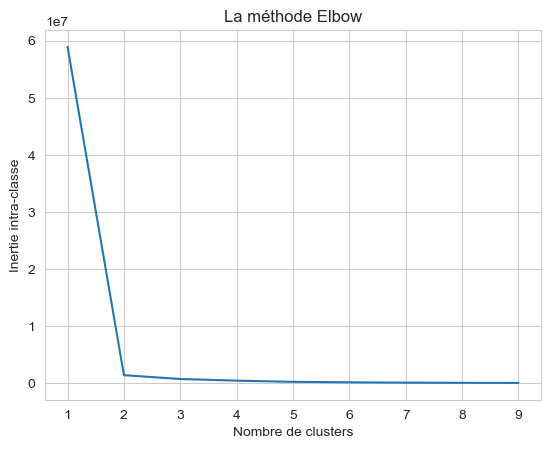

In [142]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Sélectionner la colonne prix_m2 comme variable d'entrée
X = df_echantillon[['prix_m2']]

# Détermination de la valeur optimale de K
tab = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    tab.append(kmeans.inertia_)

# Tracer le graphique de la méthode Elbow
plt.plot(range(1, 10), tab)
plt.title("La méthode Elbow")
plt.xlabel("Nombre de clusters")
plt.ylabel("Inertie intra-classe")
plt.show()

In [143]:
# On vérifie les données de la prédiction
#calculer les statistiques descriptives pour chque cluster :

# Statistiques descriptives pour le cluster 2 (locaux commerciaux)
print("\nStatistiques pour le cluster 2 (locaux commerciaux) :")
cluster_2['prix_m2'].describe()


Statistiques pour le cluster 2 (locaux commerciaux) :


count       20.000000
mean      9806.924674
std        232.955000
min       9194.697790
25%       9705.214437
50%       9842.717300
75%       9979.592847
max      10113.195822
Name: prix_m2, dtype: float64

In [144]:
# Statistiques descriptives pour le cluster 1 (appartements)
print("Statistiques pour le cluster 1 (appartements) :")
cluster_1['prix_m2'].describe()


Statistiques pour le cluster 1 (appartements) :


count      20.000000
mean     7408.775030
std       141.329995
min      7207.217630
25%      7304.332833
50%      7374.091721
75%      7512.112911
max      7666.071700
Name: prix_m2, dtype: float64

Nous avons obtenu notre prédiction. Nous pouvons changer les labels et remplacer les valeurs à 0 par Local industriel. commercial ou assimilé et les valeurs à +1 par Appartement. 

In [145]:
# Remplacer les valeurs dans la colonne 'cluster' par 0 et 1
df_echantillon['cluster'] = df_echantillon['cluster'].map({'Appartement': 1, 'Local industriel. commercial ou assimilé': 0})

df_echantillon.head()

,code_postal,nom_commune,prix_m2,cluster
0,75019,Paris 19e Arrondissement,9871.444128,NaN
1,75019,Paris 19e Arrondissement,10045.572493,NaN
2,75019,Paris 19e Arrondissement,9194.697790,NaN
3,75019,Paris 19e Arrondissement,9469.142168,NaN
4,75019,Paris 19e Arrondissement,7463.610005,NaN


In [146]:
from sklearn.cluster import KMeans

# Sélectionner la colonne prix_m2 comme variable d'entrée
X = df_echantillon[['prix_m2']]

# Initialiser et entraîner le modèle KMeans avec 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)

# Affecter chaque point de données à un cluster
df_echantillon['cluster'] = kmeans.labels_

# Créer les labels en fonction des clusters
df_echantillon['label'] = df_echantillon['cluster'].map({1: 'Local industriel. commercial ou assimilé', 0: 'Appartement'})

# Afficher le DataFrame pour vérification
df_echantillon.head(10)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,code_postal,nom_commune,prix_m2,cluster,label
0,75019,Paris 19e Arrondissement,9871.444128,1,Local industriel. commercial ou assimilé
1,75019,Paris 19e Arrondissement,10045.572493,1,Local industriel. commercial ou assimilé
2,75019,Paris 19e Arrondissement,9194.697790,1,Local industriel. commercial ou assimilé
3,75019,Paris 19e Arrondissement,9469.142168,1,Local industriel. commercial ou assimilé
4,75019,Paris 19e Arrondissement,7463.610005,0,Appartement
5,75019,Paris 19e Arrondissement,9982.016919,1,Local industriel. commercial ou assimilé
6,75019,Paris 19e Arrondissement,9674.262777,1,Local industriel. commercial ou assimilé
7,75019,Paris 19e Arrondissement,7348.917415,0,Appartement
8,75019,Paris 19e Arrondissement,9789.051438,1,Local industriel. commercial ou assimilé
9,75019,Paris 19e Arrondissement,7616.420959,0,Appartement


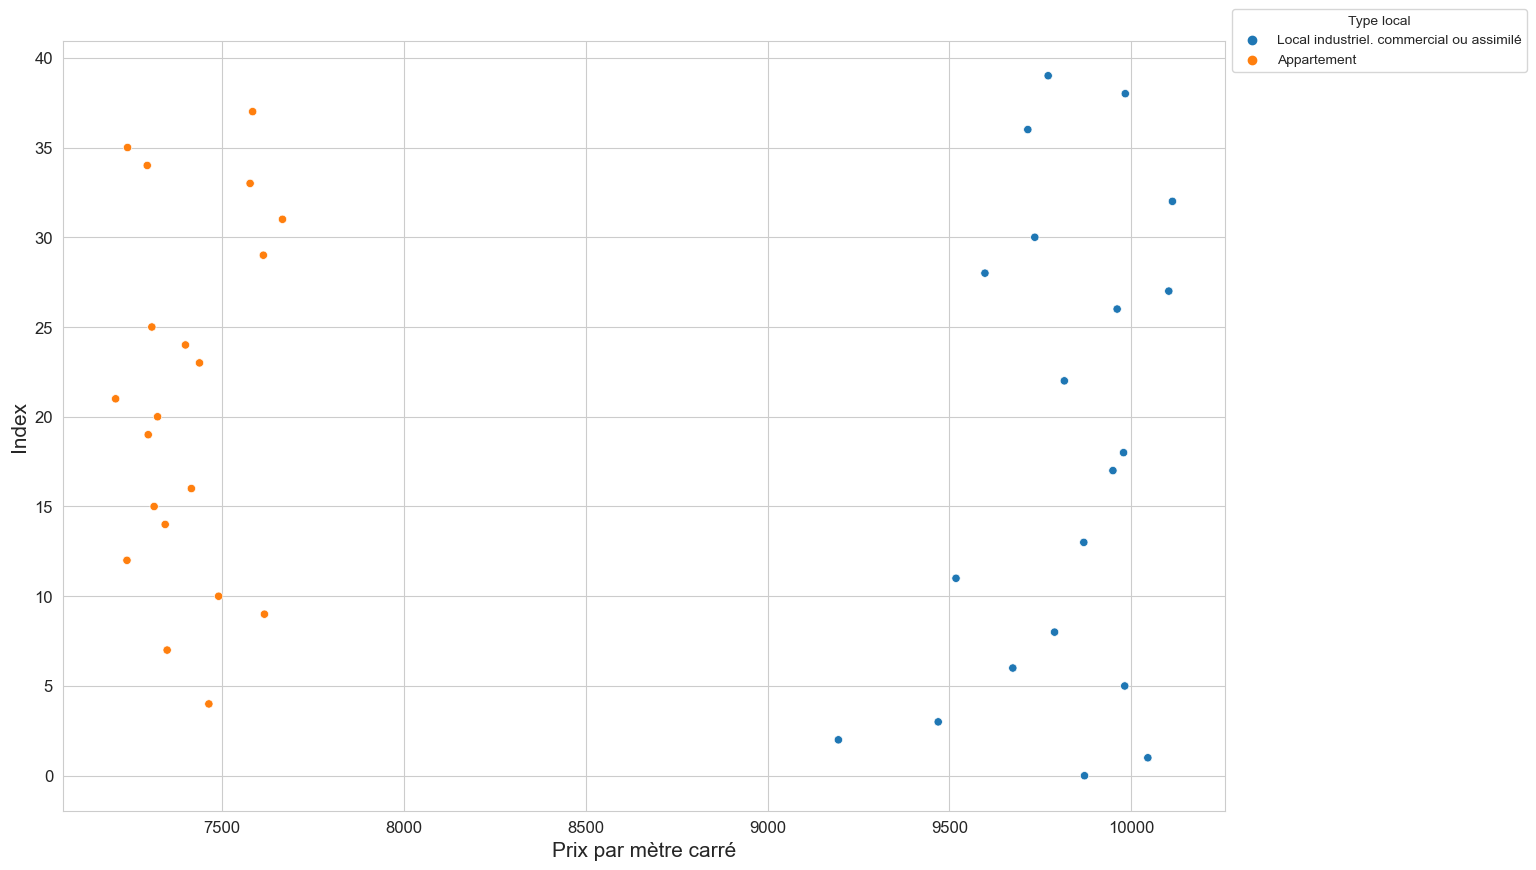

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
# Créer le scatter plot
# Définir un style de seaborn
sns.set_style("whitegrid")
sns.scatterplot(data=df_echantillon, x="prix_m2", y=range(len(df_echantillon)), hue="label")


# Ajouter une légende en dehors du plot
plt.legend(loc='center left', bbox_to_anchor=(1, 1), title="Type local")

# Définir les étiquettes des axes avec des polices plus grandes
plt.xlabel("Prix par mètre carré", fontsize=15)
plt.ylabel("Index", fontsize=15)


# Ajuster la taille des ticks des axes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# Afficher le plot
plt.show()

# Milestone 5 - Analyse et présentation des résultats

Mes conclusions sur l'analyse et les limites de l'exercice : la moyenne des prix au mètre carré, des locaux commerciaux (9806.92) est plus élevée que les appartements (7408.72). L'écart type des locaux commerciaux (232.96)est plus élevé que l'écart type des appartemets (141.33), ce qui montre une variablité plus importante dans les locaux commerciaux, cela peut être lié à une grande diversité des types des locaux. la plage des prix dans les locaux commerciaux (9194.70-10113.20) est plus large que celle des apprtements (7207.22-7666.07), ce qui confirme une variabilité plus importante des prix dans les locaux commerciaux. Pour conclure, les locaux commerciaux ont tendance à avoir des prix au M2 plus élevés et une variabilité plus importante par rapport aux appartements. 

-les limites de cet exercice peuvent être liées au choix des variables, l'analyse est basée seulement sur le prix au M2 pour les clusters, pouratnt la localisation et la taille du bien peuvent être des variables importantes pour classer ces biens. Pour obtenir des résultats plus robustes, une exploration poussée des données est nécessaire, en effectuant des essais avec différents nombre de clusters, en effet le nombre de cluster à 2 est fixé de manière arbitraire. la classifcation des biens demeure subjective, en effet cette interprétation dépend de la connaissance du domaine. pour finir les résultats peuvent ne pas être généralisables par exemple à d'autres régions, car ils sont spécifiques aux données et à la méthode utilisées.

In [148]:
#quelques pistes d'analyses pour aller plus loin dans notre exercice et apporter plus de prcésions

In [149]:
# Analyson l'historique des transactions dans tous les arrondissements

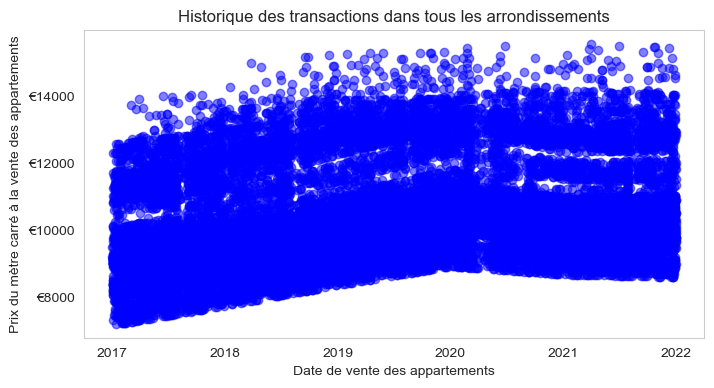

In [151]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Tracer le graphique
plt.figure(figsize=(8, 4))

dates_vente = df_h_immobilier['date_mutation']
prix_m2 = df_h_immobilier['valeur_fonciere'] / df_h_immobilier['surface_reelle']  # Calculer le prix du mètre carré

plt.scatter(dates_vente, prix_m2, color='blue', alpha=0.5)

plt.xlabel('Date de vente des appartements')
plt.ylabel('Prix du mètre carré à la vente des appartements')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid(which='both')
plt.title('Historique des transactions dans tous les arrondissements')

plt.show()

In [152]:
#Comprendre la corrélation entre les différentes variables avec la matrice de corrélation

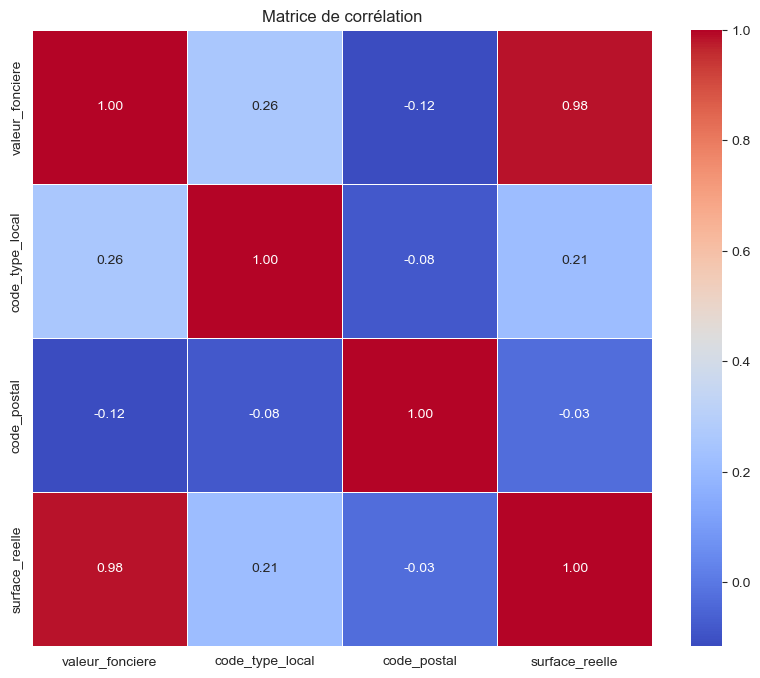

In [154]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sélectionner toutes les caractéristiques numériques pertinentes
features = ['valeur_fonciere', 'code_type_local', 'code_postal', 'surface_reelle']

# Créer un sous-dataframe avec les caractéristiques sélectionnées
df_selected = df_h_immobilier[features]

# Calculer la corrélation
correlation_matrix = df_selected.corr()

# Visualiser la corrélation avec une heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matrice de corrélation')
plt.show()

In [155]:
!pip install folium

Defaulting to user installation because normal site-packages is not writeable


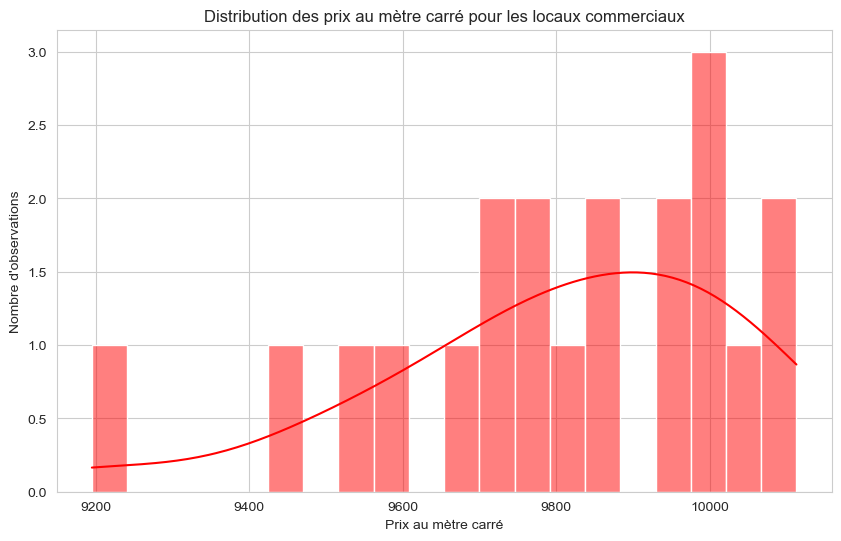

In [157]:
# Visualiser la distribution des prix au mètre carré pour le cluster locaux commerciaux 
# Import des bibliothèques nécessaires
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrer les données pour obtenir uniquement les observations du cluster des locaux commerciaux
df_locaux_commerciaux = df_echantillon[df_echantillon['label'] == 'Local industriel. commercial ou assimilé']

# Afficher l'histogramme pour le cluster des locaux commerciaux
plt.figure(figsize=(10, 6))
sns.histplot(data=df_locaux_commerciaux, x='prix_m2', kde=True, bins=20, color='red')
plt.title("Distribution des prix au mètre carré pour les locaux commerciaux")
plt.xlabel("Prix au mètre carré")
plt.ylabel("Nombre d'observations")
plt.show()

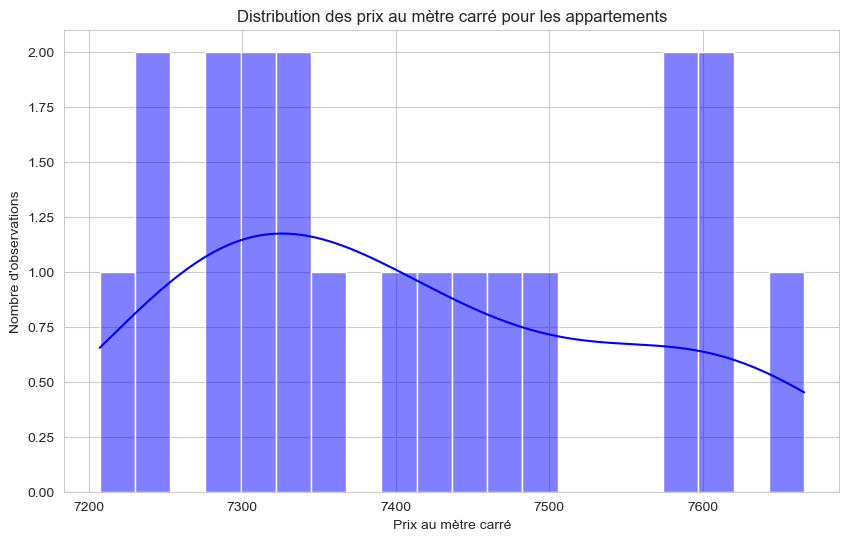

In [158]:
# Visualiser la distribution des prix au mètre carré pour le cluster appartements
# Import des bibliothèques nécessaires
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrer les données pour obtenir uniquement les observations du cluster des appartements
df_appartements = df_echantillon[df_echantillon['label'] == 'Appartement']

# Afficher l'histogramme pour le cluster des appartements
plt.figure(figsize=(10, 6))
sns.histplot(data=df_appartements, x='prix_m2', kde=True, bins=20, color='blue')
plt.title("Distribution des prix au mètre carré pour les appartements")
plt.xlabel("Prix au mètre carré")
plt.ylabel("Nombre d'observations")
plt.show()

In [159]:
import folium
from sklearn.cluster import KMeans

# Créer une carte centrée sur une certaine latitude et longitude
latitude = df_portefeuille['latitude'].mean()
longitude = df_portefeuille['longitude'].mean()
m = folium.Map(location=[latitude, longitude], zoom_start=12)

# Sélectionner les données de latitude et de longitude pour le clustering
X = df_portefeuille[['latitude', 'longitude']]

# Initialiser et entraîner le modèle KMeans avec 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)

# Créer une liste pour stocker les clusters
clusters = [[] for _ in range(2)]

# Ajouter chaque point à son cluster correspondant
for i, label in enumerate(kmeans.labels_):
    clusters[label].append(X.iloc[i])

# Ajouter des marqueurs pour chaque cluster
for cluster_id, cluster in enumerate(clusters):
    for point in cluster:
        # Ajouter un marqueur pour chaque point dans le cluster
        folium.Marker([point['latitude'], point['longitude']], popup=f'Cluster {cluster_id}').add_to(m)

# Afficher la carte
m

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [160]:
#Effectuez une analyse de variance (ANOVA) pour tester s'il existe des différences significatives dans les prix au mètre carré entre les différents clusters.

<Axes: xlabel='prix_m2', ylabel='label'>

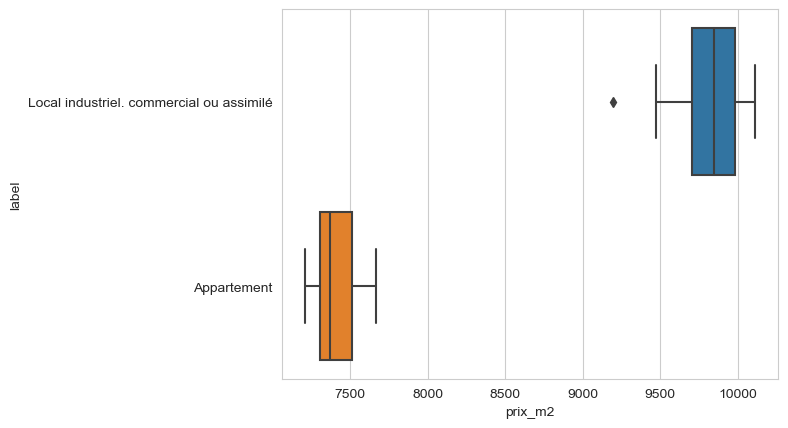

In [76]:
sns.boxplot(data=df_echantillon, x="prix_m2", y="label")

In [77]:
from scipy.stats import f_oneway

# Effectuer un test ANOVA pour comparer les prix au mètre carré entre les clusters
anova_result = f_oneway(cluster_1['prix_m2'], cluster_2['prix_m2'])

print("Résultats de l'analyse de variance (ANOVA) :")
print("Statistique F :", anova_result.statistic)
print("p-value :", anova_result.pvalue)
print('on observe des différences significatives dans les prix au mètre carré entre les deux clusters')

Résultats de l'analyse de variance (ANOVA) :
Statistique F : 1549.2864585572515
p-value : 2.077900217849913e-32
on observe des différences significatives dans les prix au mètre carré entre les deux clusters


In [78]:
#évaluer la performance de notre modèle 'régression linéaire'

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Sélectionner les caractéristiques pertinentes pour X
X = df_h_immobilier[['surface_reelle']]

# Sélectionner la variable cible pour y
y = df_h_immobilier['valeur_fonciere']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instancier le modèle de régression linéaire
model = LinearRegression()

# Entraîner le modèle sur l'ensemble d'entraînement
model.fit(X_train, y_train)

# Prédire les valeurs sur l'ensemble de test
y_pred = model.predict(X_test)

# Calcul des métriques de performance
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Affichage des métriques
print("Coefficient de détermination (R^2) :", r2)
print("Erreur quadratique moyenne (EQM) :", mse)
print("Erreur absolue moyenne (EAM) :", mae)

Coefficient de détermination (R^2) : 0.9767198747715434
Erreur quadratique moyenne (EQM) : 13898897114.627028
Erreur absolue moyenne (EAM) : 54137.800895828426


In [80]:
# Ces résultats montrent que le modèle de régression linéaire fonctionne bien pour prédire la valeur foncière en fonction de la surface réelle. En revanche il serait utile, de prendre en compte d'autres caractéristiques pour améliorer la précision de la prédiction, cela dépend de la complexité du sujet abordé.